## ANOVA Test with real research data

## Diagnostic Checking


### Assumptions to satisfy to generate reliable ANOVA test results

<ol>
    <li><b>Independence:</b> The samples making up the k groups must be independent of one another, and the observations in each group must be independent and identically distributed (iid).</li>
    <li><b>Normality:</b> The observations in each group should be normally distributed, or at least approximately so.</li>
    <li><b>Equality of variances:</b> The variance of the observations in each group should be equal, or at least approximately so.</li>
</ol>

In [12]:
#Read in the data

CompGov <- read.csv("C:/Users/ASG/Dropbox/Scholarship/AhmedBey/Comparative-GovData/CompGov.csv")

#Review the structure of the Ottoman Governors' Data set (OttomanGovData)
head(CompGov)

,Tenure,CapitalCity,Country
,<dbl>,<chr>,<chr>
1,7,Constantine,Algeria
2,14,Constantine,Algeria
3,20,Constantine,Algeria
4,14,Constantine,Algeria
5,25,Constantine,Algeria
6,6,Constantine,Algeria


In [14]:
# We're interested in comparing the mean tenure lengths by capital city to see whether they're all equal. 
# Use table() to summarize the four sample sizes. 

table(CompGov$CapitalCity)


    Algiers       Cairo Constantine    Damascus 
        102         167          46         244 

### Equality of variance test

Assuming independence of the data, before implementing the test, you must first check that the other assumptions are valid. To examine the equality of variances, you can use the same informal rule of thumb as used in the two-sample t-test. That is, you can assume equality of variances if the ratio of the largest sample standard deviation to the smallest is less than 2.

In [15]:
Comp.sds <- tapply(CompGov$Tenure, INDEX=CompGov$CapitalCity, FUN=sd)
Comp.sds

Algiers       Cairo Constantine    Damascus 
   3.764572    3.571662    6.810797    1.774750

In [16]:
max(Comp.sds)/min(Comp.sds)

[1] 3.83761

<b>In this case, the ratio of maximum to minimum standard deviation (3.84) is greater than 2, so this data does not satisfy the equality of variance assumption.</b>

### Normality Test

Next, we need to consider the assumption of normality of the raw observations. This can be difficult to determine in many real-data examples. At least, though, it's worthwhile to inspect histograms and QQ plots for signs of non-normality. To achieve this, we need to <em>mean-center</em> each tenure length by its respective city's mean. We can do this by taking the original vector of tenure lengths and subtracting from it the Comp.means vector, but first, we must rearrange and replicate the latter elements to correspond to the elements in the former. This is done by using as.factor on the factor vector that represents capital city, giving the numeric value of the levels of CompGov$CapitalCity for each record in the original data frame. When that vector is passed via the square brackets to Comp.means, you get the correct group mean matched to each observation. In the context of the current analysis, these group-wise, mean-centered values are also referred to as residuals. You can now assess normality of the observations as a whole using the residuals. To inspect a normal QQ plot, use qqnorm and qqline. 

In [8]:
#Use tapply() to get each city's mean tenure. 

OttomanGovData.means <-tapply(OttomanGovData$Tenure, INDEX = OttomanGovData$CapitalCity, FUN=mean)
OttomanGovData.means

Algiers       Cairo Constantine    Damascus 
   3.078431    1.959082    5.854333    1.428975

In [9]:
#Had to change from as.numeric to as.factor from chickwts example in the Book of R.
tenure.meancen <- OttomanGovData$Tenure-OttomanGovData.means[as.factor(OttomanGovData$CapitalCode)]

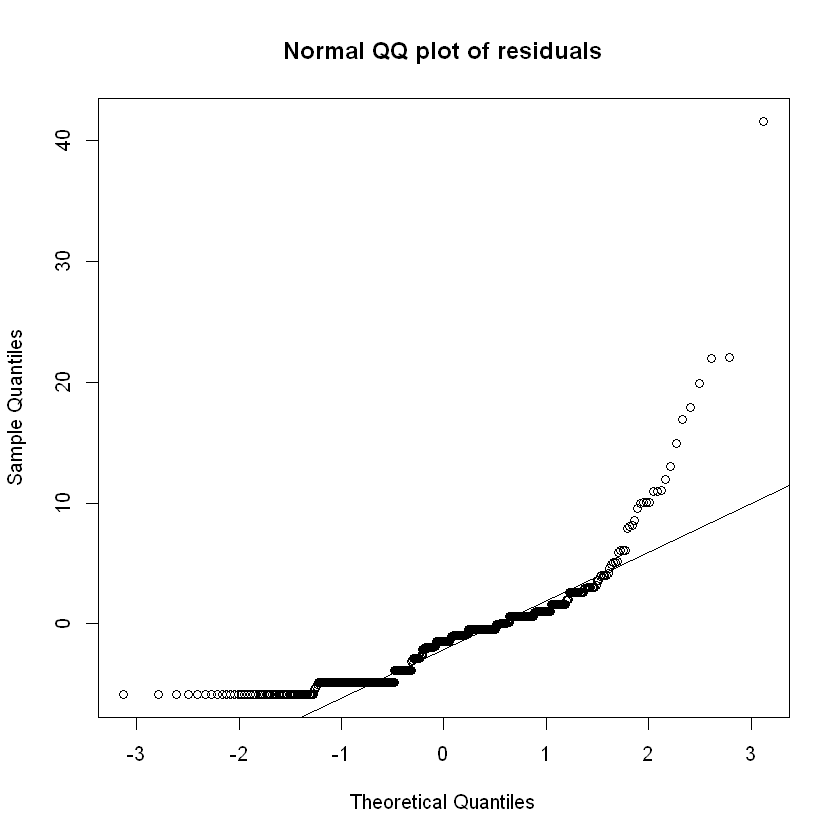

In [10]:
qqnorm(tenure.meancen,main="Normal QQ plot of residuals")
qqline(tenure.meancen)

#The QQ  plot shows that the data are not normal.

### Analysis of Comparative Ottoman Governors' Data
1. For this application, the samples are, indeed, independent. 
2. The QQ plot shows that the data are not normaly, however. This will impact the overall effectiveness of detecting a true difference in the means.
3. The variances are not approximately equal based on our informal comparison of maximum and minimum standard deviations above.

NOTE: There are an uneven number of observations in each group, so the test is unbalanced, which makes it more sensitive to potentially detrimental effects since the assumption of normality is not well-founded.

This means that the ANOVA test might be suggestive of a potential significant difference, but other methods will be needed to explore the differences between the provincial capital cities' mean tenures. 

## To run a <b>one-way ANOVA test</b>, choose the following variable types in your data set:
<ul>
       <li><b>Quantitative (interval or ratio) variable</b>, which is your dependent or outcome variable</li>
        Example: Tenure length
     <li><b>Categorical (nominal or ordinal) variable</b>, which is your independent variable and the variable by which you'll group the quantitative data.</li>
        Example: Capital City
</ul>


In [4]:
#Run the ANOVA test and save it with an object name
tenureOut <- aov(Tenure ~ CapitalCity, data=OttomanGovData) #Order matters: Dependent/outcome variable ~ Independent variable
#Generate the ANOVA table
summary(tenureOut)

             Df Sum Sq Mean Sq F value   Pr(>F)    
CapitalCity   3    846  282.07   24.45 7.12e-15 ***
Residuals   555   6402   11.53                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [5]:
#single step:
summary(aov(Tenure ~ CapitalCity, data=OttomanGovData))

             Df Sum Sq Mean Sq F value   Pr(>F)    
CapitalCity   3    846  282.07   24.45 7.12e-15 ***
Residuals   555   6402   11.53                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Meaning of the ANOVA Test Results

F-value: 24.45 
If p-value < alpha, we can reject the null hypothesis.
The standard alpha value is 0.05, which corresponds to a 95% confidence interval, but you can choose a more conservative alpha of 0.01 or even 0.001 instead prior to running your test.

The p-value, which represents the probability of getting an F-value at least as large as that reported (24.45), is 7.12e-15. 

Between the actual numerical score of the p-value and the 3 significance stars R displays, which means that p ≤ 0.001, we can state that p < alpha = 0.01. This means we can reject the null hypothesis that the means across groups are equal. 
That, in turn, means that at least one group's mean is different, and this result, based on the

There is a statistically significant difference in the mean governor tenure lengths across different Ottoman provincial capital cities between the sixteenth and nineteenth centuries. These differences can be explored with pairwise t-tests to determine which capital mean tenure lengths are most different from the others.